In [1]:
pip install kaggle --upgrade --force

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 122kB 6.9MB/s 
     |████████████████████████████████| 163kB 31.6MB/s 
     |████████████████████████████████| 235kB 52.2MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 143kB 44.9MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=ef1978276929ede750daddfb05b9710ec4b7f5daab2e5e8a8093c6647239783a
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5486 sha256=ff4106e100354811667ece21bc3cb907790e9eaf7c6e3dd65377a9445f8cde11
  Stored in directory: /root/.cache/pip/wheels/11/94/81/312969455540cb0e6a773e5d

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fabiengaillard","key":"3f7e006b3b2852f628483b28120d356c"}'}

In [73]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [75]:
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3137           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      22925           False  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5272           False  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        393           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1655           False  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       7024   

In [84]:
#!kaggle competitions download semi-inat-2020

#!kaggle datasets download -d gpiosenka/100-bird-species

!kaggle datasets download -d slothkong/10-monkey-species

 99% 539M/547M [00:13<00:00, 44.4MB/s]
100% 547M/547M [00:13<00:00, 42.7MB/s]


In [85]:
#!unzip /content/semi-inat-2020.zip
#!unzip /content/100-bird-species.zip
!unzip /content/10-monkey-species.zip

Archive:  /content/10-monkey-species.zip
  inflating: monkey_labels.txt       
  inflating: training/training/n0/n0018.jpg  
  inflating: training/training/n0/n0019.jpg  
  inflating: training/training/n0/n0020.jpg  
  inflating: training/training/n0/n0021.jpg  
  inflating: training/training/n0/n0022.jpg  
  inflating: training/training/n0/n0023.jpg  
  inflating: training/training/n0/n0024.jpg  
  inflating: training/training/n0/n0025.jpg  
  inflating: training/training/n0/n0026.jpg  
  inflating: training/training/n0/n0027.jpg  
  inflating: training/training/n0/n0028.jpg  
  inflating: training/training/n0/n0029.jpg  
  inflating: training/training/n0/n0030.jpg  
  inflating: training/training/n0/n0031.jpg  
  inflating: training/training/n0/n0032.jpg  
  inflating: training/training/n0/n0033.jpg  
  inflating: training/training/n0/n0034.jpg  
  inflating: training/training/n0/n0035.jpg  
  inflating: training/training/n0/n0036.jpg  
  inflating: training/training/n0/n0037.jpg  
 

In [86]:
!pip install tensorflow

In [0]:
import numpy as np
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import ActivityRegularization, Lambda
from keras.layers import Activation, Dropout, Concatenate
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from keras.models import Model
from sklearn.metrics import confusion_matrix
from keras.layers.normalization import BatchNormalization
import itertools
import json
import shutil
from keras.layers import Input
from subprocess import check_output
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input
#from keras.applications.densenet import DenseNet121, preprocess_input
#from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [0]:
# DATA PATHS BIRD DATASET
'''
train_path = 'train/'
valid_path = 'valid/'
test_path = 'test/'
especes = []
'''
#DATA PATHS MONKEY DATASET
train_path = 'training/training/'
valid_path = 'validation/validation/'
test_path = 'test/'
especes = []

In [0]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

In [107]:
especes = get_immediate_subdirectories(valid_path)
len(especes)

10

In [108]:
''' #bird dataset
train_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_path, target_size=(224,224),classes=especes, batch_size=37) #107
valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(valid_path, target_size=(224,224), classes=especes, batch_size=40) #50
test_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_path, target_size=(224,224), classes=especes, batch_size=50)   #20
'''

' #bird dataset\ntrain_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_path, target_size=(224,224),classes=especes, batch_size=37) #37\nvalid_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(valid_path, target_size=(224,224), classes=especes, batch_size=40) #50\ntest_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_path, target_size=(224,224), classes=especes, batch_size=50)   #20\n'

In [109]:
#monkey dataset
train_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_path, target_size=(224,224),classes=especes, batch_size=61) #18
valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(valid_path, target_size=(224,224), classes=especes, batch_size=34) #8
test_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_path, target_size=(224,224), classes=especes, batch_size=50)   #20

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [0]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_batches)
#labels[2]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


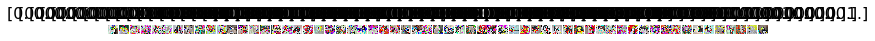

In [112]:
plots(imgs, titles=labels)

In [113]:
'''########################################
# DENSENET121
########################################

base_model = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
for layer in base_model.layers:
   layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Lambda(lambda y: K.l2_normalize(y, axis=-1))(x)

'''
'''
x = Dense(8000, activation = 'relu')(x)  #architecture A2 bird dataset
x = Dropout(0.5)(x)
'''
'''
####
'''
'''
x = Dense(400, activation = 'relu')(x)  #architecture A2 money dataset
x = Dropout(0.5)(x)
'''
'''
#x = Dense(200, activation = 'softmax')(x) #bird dataset
x = Dense(10, activation = 'softmax')(x)   #monkey dataset
modelf = Model(base_model.input, x)

########################################'''

"\n#x = Dense(200, activation = 'softmax')(x) #bird dataset\nx = Dense(10, activation = 'softmax')(x)   #monkey dataset\nmodelf = Model(base_model.input, x)\n\n########################################"

In [114]:
'''
########################################
# MOBILENETV2
########################################

base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
for layer in base_model.layers:
   layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Lambda(lambda y: K.l2_normalize(y, axis=-1))(x)

'''
'''
x = Dense(8000, activation = 'relu')(x)  #architecture A2 bird dataset
x = Dropout(0.5)(x)
'''
'''
####
'''
'''
x = Dense(400, activation = 'relu')(x)  #architecture A2 money dataset
x = Dropout(0.5)(x)
'''
'''
#x = Dense(200, activation = 'softmax')(x) #bird dataset
x = Dense(10, activation = 'softmax')(x)   #monkey dataset
modelf = Model(base_model.input, x)

########################################
'''

"\n#x = Dense(200, activation = 'softmax')(x) #bird dataset\nx = Dense(10, activation = 'softmax')(x)   #monkey dataset\nmodelf = Model(base_model.input, x)\n\n########################################\n"

In [0]:

########################################
# VGG16
########################################

modelf = Sequential()
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=(224,224,3)))

for layer in base_model.layers:
  modelf.add(layer)

for layer in modelf.layers:
    layer.trainable=False

modelf.add(GlobalAveragePooling2D())
modelf.add(Lambda(lambda x: K.l2_normalize(x, axis=-1)))

'''

modelf.add(Dense(8000, activation='relu'))  #bird dataset A2 architecture
modelf.add(Dropout(0.5))
'''

'''
modelf.add(Dense(400, activation='relu'))  # monkey dataset A2 architecture
modelf.add(Dropout(0.5))

'''

#modelf.add(Dense(200)) #bird dataset
modelf.add(Dense(10))  #monkey dataset
modelf.add(Activation('softmax'))

########################################


In [120]:
'''
########################################
# VGG19
########################################

modelf = Sequential()
base_model = VGG19(include_top=False, weights='imagenet', input_tensor=Input(shape=(224,224,3)))

for layer in base_model.layers:
  modelf.add(layer)

for layer in modelf.layers:
    layer.trainable=False

modelf.add(GlobalAveragePooling2D())
modelf.add(Lambda(lambda x: K.l2_normalize(x, axis=-1)))

'''
'''
modelf.add(Dense(8000, activation='relu'))  #bird dataset A2 architecture
modelf.add(Dropout(0.5))
'''
'''
'''
'''
modelf.add(Dense(400, activation='relu'))  # monkey dataset A2 architecture
modelf.add(Dropout(0.5))
'''
'''
#modelf.add(Dense(200)) #bird dataset
modelf.add(Dense(10))   #monkey dataset
modelf.add(Activation('softmax'))

########################################
'''

"\n#modelf.add(Dense(200)) #bird dataset\nmodelf.add(Dense(10))   #monkey dataset\nmodelf.add(Activation('softmax'))\n\n########################################\n"

In [0]:
modelf.compile(Adam(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = modelf.fit_generator(train_batches, steps_per_epoch=18, validation_data=valid_batches, validation_steps=8, epochs=40, verbose=1) #monkey dataset
#history = modelf.fit_generator(train_batches, steps_per_epoch=107, validation_data=valid_batches, validation_steps=50, epochs=40, verbose=1) #Bird dataset

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision en apprentissage et validation')
plt.xlabel('Epoch')
plt.legend(['Acc Train', 'Acc Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte en apprentissage et validation')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Val'], loc='upper left')
plt.show()

In [0]:
for layer in modelf.layers:
  layer.trainable=True

In [0]:
modelf.compile(Adam(lr=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
history = modelf.fit_generator(train_batches, steps_per_epoch=18, validation_data=valid_batches, validation_steps=8, epochs=40, verbose=1) #monkey dataset
#history = modelf.fit_generator(train_batches, steps_per_epoch=107, validation_data=valid_batches, validation_steps=50, epochs=40, verbose=1) #Bird dataset

In [0]:
modelf.compile(Adam(lr=0.00001),loss='categorical_crossentropy', metrics=['accuracy'])
history = modelf.fit_generator(train_batches, steps_per_epoch=18, validation_data=valid_batches, validation_steps=8, epochs=40, verbose=1) #monkey dataset
#history = modelf.fit_generator(train_batches, steps_per_epoch=107, validation_data=valid_batches, validation_steps=50, epochs=40, verbose=1) #Bird dataset

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision en apprentissage et validation')
plt.xlabel('Epoch')
plt.legend(['Acc Train', 'Acc Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte en apprentissage et validation')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Val'], loc='upper left')
plt.show()